# Lyrical Analysis

## Word Cloud and Sentiment

This notebook contains a Python script that analyzes song lyrics. The analysis is performed in two parts:

1. **Word Cloud Visualization**: The script takes a string of song lyrics and generates a word cloud. This visualization helps understand the frequency of words in the song lyrics. The most frequently occurring words appear larger in the word cloud. In this script, we use the `CountVectorizer` from sklearn to convert text data into a matrix of word counts. We then use the `WordCloud` function from the wordcloud library to generate the visualization.

2. **Sentiment Analysis**: The script also performs sentiment analysis on the song lyrics using the `SentimentIntensityAnalyzer` from the nltk library. Sentiment analysis is the process of determining the emotional tone behind a series of words. It is used to gain an understanding of the attitudes, opinions and emotions expressed within the text.

To use the script, call the function `analyze_lyrics()` with your song lyrics as an argument. The function will display the word cloud and print the sentiment scores.

```python
analyze_lyrics("your song lyrics here")


In [54]:
# Import necessary libraries
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from PIL import Image

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jakehclark/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### Function to use NLTK to:
    - Tokenize
    - Count word frequencies
      - Create frequency dictionary 
    - Generate word cloud
    - Use SentimentIntensityAnalyzer to get sentiment scores
      - Score Categories:
        - `neg` Negative: A measure of how negative the text is (0 = not negative, 1 = very negative)
        - `neu` Neutral: A measure of how neutral the text is (0 = very neutral, 1 = not neutral)
        - `pos` Positive: A measure of how positive the text is (0 = not positive, 1 = very positive)
        - `compound` Compound: A measure of the overall sentiment of the text (0 = very negative, 1 = very positive)

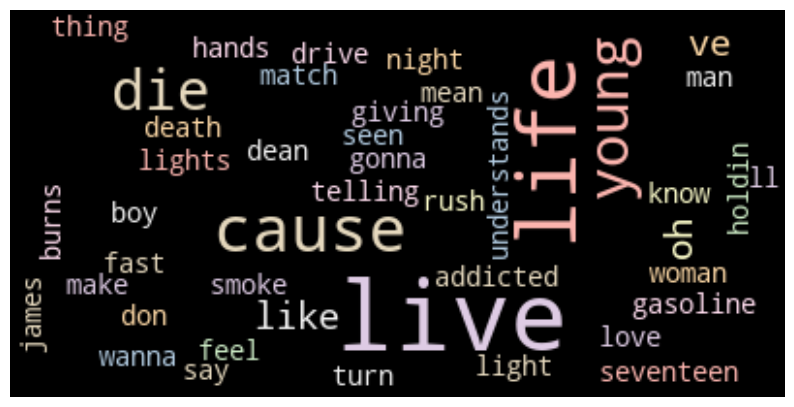

{'neg': 0.115, 'neu': 0.838, 'pos': 0.046, 'compound': -0.9768}


In [3]:
"""
    This function takes a string of song lyrics, creates a word cloud visualization, 
    and performs sentiment analysis.

    Parameters:
    lyrics (str): The song lyrics to analyze.
"""
def analyze_lyrics(lyrics):
    '''
        The CountVectorizer is a part of the sklearn.feature_extraction.text library in Python. 
        The sklearn.feature_extraction.text is a high-level library in Python that includes several classes for extracting 
        features from text. The CountVectorizer is one of these classes.
        
        The CountVectorizer provides a simple way to both tokenize a collection of text documents and build a vocabulary 
        of known words, but also to encode new documents using that vocabulary. Tokenization is the process of breaking 
        down text into words, phrases, symbols, or other meaningful elements (called tokens). The output from the 
        CountVectorizer is a sparse matrix representation of the document, meaning that only the presence (or frequency) 
        of the tokens is recorded, not their order.
    '''
    vectorizer = CountVectorizer(stop_words='english')

    '''
        'fit_transform' is a function that fits the model with the lyrics and then transforms the lyrics into a matrix 
        of token counts. The 'fit' part involves learning the model parameters (i.e., learning the vocabulary) from the 
        data, and the 'transform' part applies this learned model to the data to transform it into the required output format 
        (i.e., a document-term matrix). The result is stored in 'word_count', which is a sparse matrix, meaning that it 
        is a matrix in which most of the elements are zero.
    '''
    word_count = vectorizer.fit_transform([lyrics])

    '''
        This line sums up the counts of each vocabulary word. In other words, it sums the frequencies of each word 
        across the entire lyrics. The 'tolist()[0]' function is used to convert the result to a list, since the sum 
        function returns a matrix and we want to work with a list for easier manipulation and visualization.
    '''
    word_freq = word_count.sum(axis=0).tolist()[0]

    '''
        The 'get_feature_names_out' function returns a list of words that the vectorizer has learned from the lyrics. 
        These words represent the features (i.e., independent variables) used by the machine learning model. In the 
        context of natural language processing, features often refer to the words or tokens in the text.
    '''
    words = vectorizer.get_feature_names_out()

    '''
    The 'zip' function is a built-in Python function that pairs up the elements of several lists. It's being used 
    here to pair up the words and their frequencies. The 'dict' function then converts these pairs into a dictionary. 
    This dictionary, 'word_freq_dict', represents a mapping from each word to its frequency in the lyrics.
    '''
    word_freq_dict = dict(zip(words, word_freq))

    '''
        Word Cloud is a data visualization technique used for representing text data where the size of each word indicates 
        its frequency or importance. Significant textual data points can be highlighted using a word cloud.
        
        The 'WordCloud' object generates a word cloud image based on the word frequencies that we've calculated. It has 
        several options that can be set to customize the look of the word cloud, including 'background_color' (color of 
        the background), 'colormap' (color map to use for the words), 'max_font_size' (the maximum font size for the 
        largest word), and 'max_words' (the maximum number of words to include in the cloud).
    '''
    wordcloud = WordCloud(background_color='black', colormap='Pastel1', max_font_size=50, max_words=100).generate_from_frequencies(word_freq_dict)

    '''
        These lines use matplotlib, a plotting library in Python, to display the generated word cloud image. The 'imshow' 
        function displays the image data (i.e., the word cloud), and 'axis("off")' removes the axis from the image. 
        The result is a visual representation of word frequency in the lyrics.
    '''
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

    '''
        Sentiment Analysis, also known as opinion mining, is a subfield of Natural Language Processing (NLP) that builds 
        systems that try to identify and extract opinions within text. It is often used in business to detect sentiment 
        in social data, gauge brand reputation, and understand customer experiences.
        
        The SentimentIntensityAnalyzer is a class in the nltk.sentiment module for sentiment analysis. It gives a sentiment 
        score to sentences.
    '''
    sia = SentimentIntensityAnalyzer()

    '''
        The 'polarity_scores' method of the SentimentIntensityAnalyzer object gives a sentiment score to each of the 
        categories: negative, neutral, positive, and compound based on the input lyrics. The compound score is a metric that calculates the sum of all the lexicon ratings which have been normalized between -1(most extreme negative) and +1 (most extreme positive). The lexicon ratings are the 
        sentiment scores assigned to individual words. This score is then normalized to be between -1 and 1.
        The 'polarity_scores' function returns a dictionary with these scores.
    '''
    sentiment = sia.polarity_scores(lyrics)

    '''
        Finally, the sentiment scores are printed out. These scores provide a measure of the overall sentiment 
        of the song lyrics. This information can be useful in many contexts, such as understanding the mood 
        of a song, comparing the sentiments of different songs, or tracking the sentiment of an artist's 
        songs over time.
    '''
    print(sentiment)

# Test
example_lyrics = """
Boy, you'll be the death of me You're my James Dean You make me feel like I'm seventeen You drive too fast You smoke too much But that don't mean a thing, 'cause I'm addicted to the rush Cause I'd rather die young than live my life without you I'd rather not live at all than live my life without you Cause I'd rather die young than live my life without you I'd rather not live at all than live my life without you You know I've been in love before You're the first one I ever seen that burns like gasoline So light a match, turn off the lights I'm holdin' on to you 'cause this might be our last night, oh Cause I'd rather die young than live my life without you I'd rather not live at all than live my life without you Cause I'd rather die young than live my life without you I'd rather not live at all than live my life without you What I'm telling you I'm giving you my life, it's in your hands And what I'm gonna do Is be a woman and you can be a man And I wanna say Nobody understands what we've been through I'd rather give up everything Than to live my, live my life without you, oh Cause I'd rather die young than live my life without you I'd rather not live at all than live my life without you Cause I'd rather die young than live my life without you I'd rather not live at all than live my life without you
"""

analyze_lyrics(example_lyrics)

## Word Cloud and Sentiment (Discography)

Total length of `lyric_string`: 225219


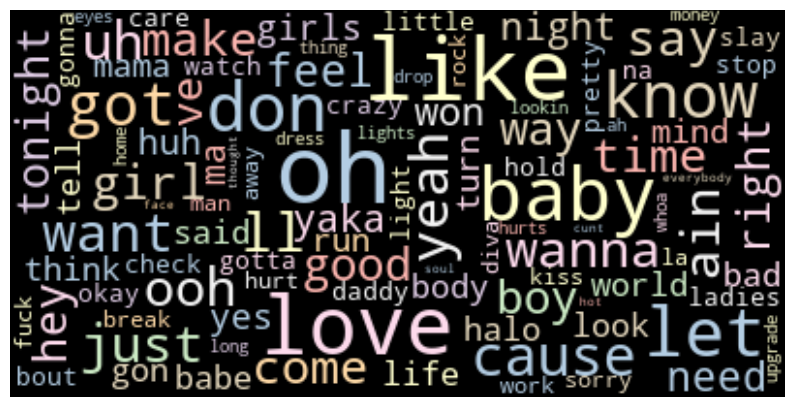

{'neg': 0.102, 'neu': 0.702, 'pos': 0.196, 'compound': 1.0}


In [4]:

import pandas as pd

df = pd.read_csv("./data/combined_lyrics.csv")
album_lyrics = df["lyric"].values

# Join all the strings in the array into a single string
lyrics_string = ' '.join(album_lyrics)

print(f"Total length of `lyric_string`: {len(lyrics_string)}")
# print(album_lyrics)

analyze_lyrics(lyrics_string)

### (Beyonce) Album Lyrics (`album_lyrics.csv`)

Definition of each column in the dataset:

- **artist**: Name of the artist
- **album**: Name of the album
- **track_title**: Title of the song
- **track_num**: Track number within the album
- **lyric**: Lyrics of the song
- **line**: Number of lines in each song
- **year**: Release year of the album

Source: [Kaggle](https://www.kaggle.com/datasets/hillaryosei/beyonce-lyrics)


## Word Cloud and Sentiment (Album)

In [40]:
def split_combined_lyrics(inc_album_names=None):
    '''
    This function splits the combined_lyrics.csv file into separate csv files for each album.
    '''
    combined_lyrics_df = None
    
    # If no album names are passed in, use the list of all album names
    if inc_album_names is None:
        # Import combined lyrics csv
        combined_lyrics_df = pd.read_csv("./data/combined_lyrics.csv")

        # Create a list of all the album names and use to filter and use as file-names when creating the csv files
        inc_album_names = combined_lyrics_df["album"].unique()

    # If no album names are passed in print a message
    if len(inc_album_names) == 0:
        print("No album names passed in.")
    # Using the the names in the album_names list
    for album_name in inc_album_names:
        # For each name, filter a selection from the original dataframe
        album_df = combined_lyrics_df[combined_lyrics_df["album"] == album_name]
        # Create a new csv file with the album name interpolated into the file name
        album_df.to_csv(f"./data/albums/{album_name}.csv")

# split_combined_lyrics()


### Creates a dataframe for all albums with a set of all lyrics for each song in the album

In [34]:
import os
import pandas as pd

def all_combined_lyrics_df():
    ''' 
    This function will create a dataframe with all of the lyrics from all of the albums.
        The returned dataframe will have two columns:
            name: the name of the album (e.g. 'dangerously_in_love') <object>
            all_lyrics: all of the lyrics from the album, combined into one string <object>
    '''
    
    # Create empty dataframe for albums_combined_lyrics
    albums_combined_lyrics = pd.DataFrame(columns=['name', 'all_lyrics', 'release_year'])

    # For each album in './data/albums', this script will:
    for album in os.listdir('./data/albums'):
        
        # Read the csv file into a dataframe called 'album_df'
        album_df = pd.read_csv(f'./data/albums/{album}')
        album_df
        
        # Remove the '.csv' from the album name
        name = album[:-4]
        
        # Store all of the lyrics from the album in a list
        all_lyrics = ' '.join(album_df['lyric'].values)
        
        # Add the album name and all of the lyrics to the albums_combined_lyrics dataframe, using concat
        albums_combined_lyrics = pd.concat([albums_combined_lyrics, pd.DataFrame({'name': name, 'all_lyrics': [all_lyrics]})])
    
    # Add release year to the dataframe for each row:
        # [2016, 2008, 2011, 2003, 2013, 2023, 2006]
    albums_combined_lyrics['release_year'] = [2016, 2008, 2011, 2003, 2013, 2023, 2006]
   
    # Sort the dataframe by release year
    albums_combined_lyrics.sort_values(by='release_year', inplace=True)
    
    # Add indexes to the dataframe
    albums_combined_lyrics.reset_index(drop=True, inplace=True)
        
    return albums_combined_lyrics
    
all_combined_lyrics_df()

,name,all_lyrics,release_year
0,Dangerously in Love,"Yes, so crazy right now Most incredibly, it's ...",2003
1,B'Day,"Bass (Uh) Hi-hat (Uh) 808 (Uh) Jay (Uh-huh, re...",2006
2,I Am...Sasha Fierce,If I were a boy Even just for a day I'd roll o...,2008
3,4,"If I ain't got nothing, I got you If I ain't g...",2011
4,BEYONCÉ,"Ms. Third Ward, your first question: What is y...",2013
5,Lemonade,You can taste the dishonesty It's all over you...,2016
6,RENAISSANCE,"Please, motherfuckers ain't stop—, please, mot...",2023


### Creates a wordcloud dashboard for the given albums in all_combined_lyrics dataframe

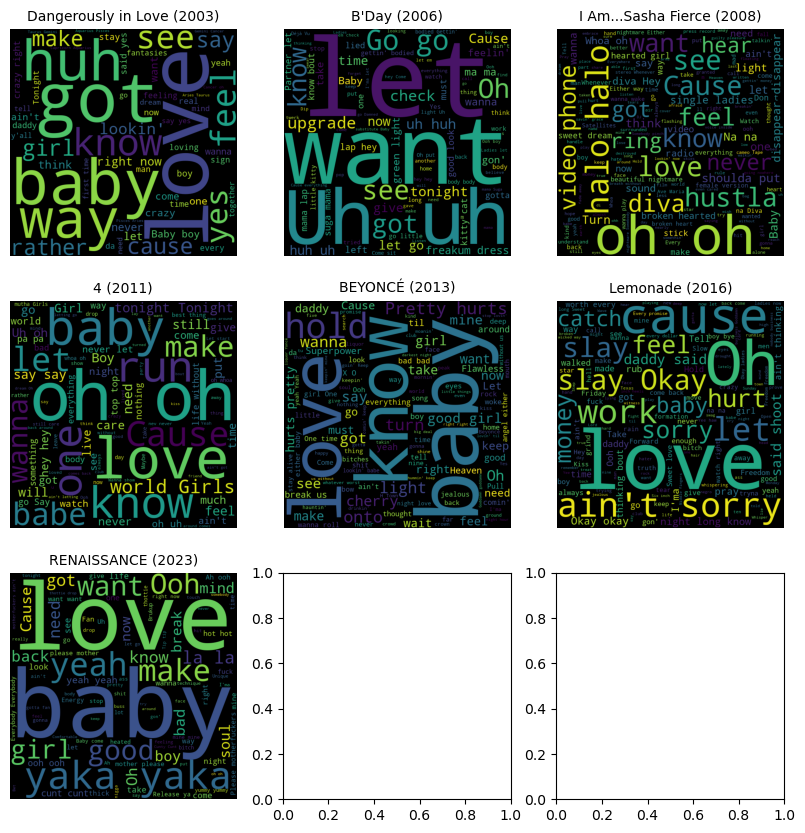

In [44]:
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def render_wordcloud_dashboard(inc_data=all_combined_lyrics_df()):
    """
    Render a wordcloud dashboard for all rows in all_combined_lyrics dataframe
       inc_data: dataframe containing all rows of lyrics
            name: <object>
            all_lyrics: <object>
    """
    # Create a single dashboard that contains individual wordclouds for each row in the dataframe
    fig, axs = plt.subplots(3, 3, figsize=(10, 10))
    
    # Create a list of axes to iterate over
    axs = axs.ravel()
    
    # For each row in the dataframe
    for index, row in inc_data.iterrows():
        
        # Create a wordcloud for the row
        wordcloud = WordCloud(width=600, height=600, 
                              background_color='black', 
                              stopwords=set(STOPWORDS), 
                              min_font_size=10).generate(row['all_lyrics'])
        
        # Add the wordcloud to the dashboard
        axs[index].imshow(wordcloud)
        axs[index].axis('off')
        axs[index].set_title(f"{row['name']} ({row['release_year']})", fontsize=10)
    
    # Display the dashboard
    plt.show()

render_wordcloud_dashboard()

## Histogram (Single)

> ***Histogram**: A histogram can be used to show the distribution of word frequencies in your text. It divides the frequencies into bins and shows how many words fall into each bin. This can be useful for understanding the overall distribution of word frequencies, rather than focusing on individual words.*

In [ ]:
## WIP

## Network Graph (Single)

**(*ChatGPT Explanation*) Network Graphs:**

If you're interested in not only the frequency of words but also their relationships with each other, a network graph could be a good choice. Nodes in the graph represent words, and edges between nodes indicate that those words often appear together. The size of the nodes can be proportional to word frequency. Libraries like NetworkX in combination with Matplotlib can help you create these visualizations.

> **Personal comment:**
>
> *🫠 I'm not sure this is useful, because the visualization doesn't seem to reveal any useful pattern. This may need to be tweaked, or perhaps there is a better method for exploring word relationships.*

```python


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jakehclark/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


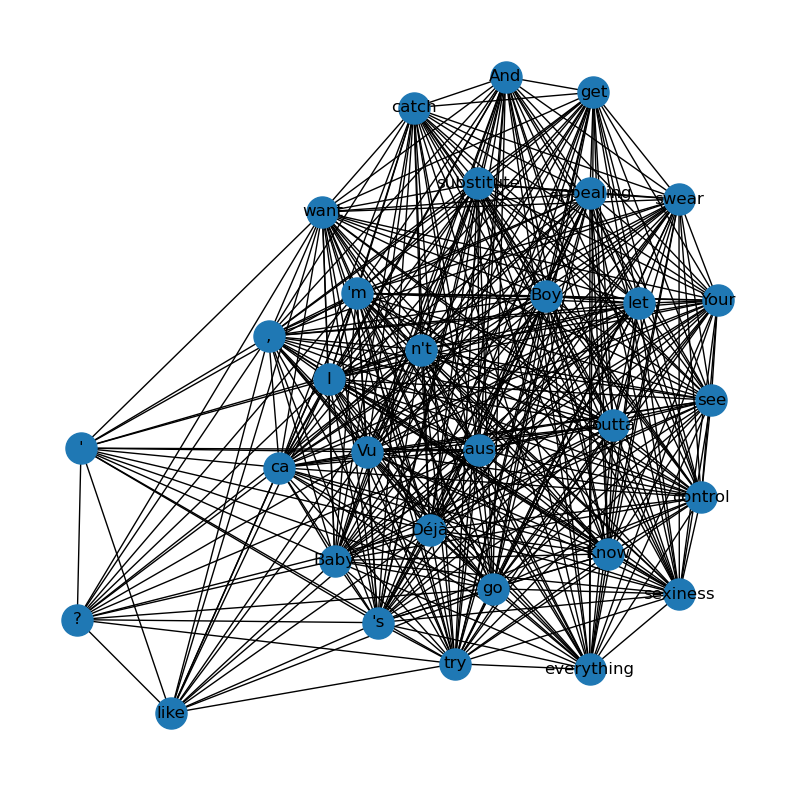

In [ ]:
def generate_network_graph(lyrics, threshold=2):
    import networkx as nx
    import matplotlib.pyplot as plt
    import nltk
    from collections import defaultdict
    from itertools import combinations
    from nltk.tokenize import word_tokenize, sent_tokenize
    from nltk.corpus import stopwords

    # Download the stopwords from NLTK
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))

    # Split the lyrics into sentences
    sentences = sent_tokenize(lyrics)

    # Tokenize each sentence into words and remove stopwords
    tokenized_sentences = [[word for word in word_tokenize(sentence) if word not in stop_words] for sentence in sentences]

    # Create a defaultdict of an integer
    co_occurrence = defaultdict(int)

    # For each sentence
    for sentence in tokenized_sentences:
        # For each pair of words in the sentence
        for i in combinations(sorted(set(sentence)), 2):
            # Increment the count
            co_occurrence[i] += 1

    # Filter the co_occurrence to get only pairs with a count higher than a threshold
    filtered_co_occurrence = {pair: count for pair, count in co_occurrence.items() if count > threshold}

    # Create a graph
    G = nx.Graph()

    # Add edges to the graph
    for pair, count in filtered_co_occurrence.items():
        G.add_edge(pair[0], pair[1], weight=count)

    # Draw the graph
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(G, seed=42)  # positions for all nodes
    nx.draw_networkx_nodes(G, pos, node_size=500)
    nx.draw_networkx_edges(G, pos, width=1)
    nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")
    plt.axis("off")
    plt.show()

lyrics = """
Bass (Uh) Hi-hat (Uh) 808 (Uh) Jay (Uh-huh, ready, uh-huh) Let's go get 'em (Uh-huh) C'mon (C'mon) I used to run base like Juan Pierre Now I run the bass hi-hat and the snare I used to bag girls like Birkin Bags Now I bag B (Boy, you hurtin' that) Brooklyn Bay where they birthed me at Now I be everywhere, the nerve of rap The audacity to have me with them curtains back Me and B, she about to sting, stand back Baby, seem like everywhere I go, I see you From your eyes, I smile, it's like I breathe you Helplessly, I reminisce, don't want to Compare nobody to you Boy, I try to catch myself, but I'm outta control Your sexiness is so appealing, I can't let it go Know that I can't get over you Cause everything I see is you And I don't want no substitute Baby, I swear it's Déjà Vu Know that I can't get over you Cause everything I see is you And I don't want no substitute Baby, I swear it's Déjà Vu Seeing things that I know can't be, am I dreaming? When I saw you walkin' past me, almost called your name Got a better glimpse and then I looked away Feels like I'm losin' it Boy, I try to catch myself, but I'm outta control Your sexiness is so appealing, I can't let it go Know that I can't get over you Cause everything I see is you And I don't want no substitute Baby, I swear it's Déjà Vu Know that I can't get over you Cause everything I see is you And I don't want no substitute Baby, I swear it's Déjà Vu Yes, Hova's flow so unusual Baby girl, you should already know It's H-O, light up the dro Cause you gon' need help tryna study my bounce Flow, blow, what's the difference? One you take in vein while the other you sniffin' It's still dope, po-po try to convict him Thats a no-go, my dough keep the scales tippin' Like 4-4s, like I'm from the H-O-U-S-T-O-N Blow wind, so Chicago of him Is he the best ever? That's the argu-a-ment I don't make the list, don't be mad at me I just make the hits like a factory I'm just one of, the one, nothin' after me No Déjà Vu, just me and my... (Oh!) Baby, I can't go anywhere Without thinking that you're there Seems like you're everywhere, it's true Gotta be having Deja Vu Cause in my mind, I want you here Get on the next plane, I don't care Is it because I'm missin' you That I'm having Déjà Vu? Boy, I try to catch myself, but I'm outta control Your sexiness is so appealing, I can't let it go Know that I can't get over you Cause everything I see is you And I don't want no substitute Baby, I swear it's Déjà Vu Know that I can't get over you Cause everything I see is you And I don't want no substitute Baby, I swear it's Déjà Vu Know that I can't get over you Cause everything I see is you And I don't want no substitute Baby, I swear it's Déjà Vu Know that I can't get over you Cause everything I see is you And I don't want no substitute Baby, I swear it's Déjà Vu
"""
 
generate_network_graph(lyrics, threshold=2)